In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [114]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv('simulated_data.csv')
# Display the first few rows of the dataset
print(data.head())

    price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900         3       1.00         1180      5650     1.0           0   
1  538000         3       2.25         2570      7242     2.0           0   
2  180000         2       1.00          770     10000     1.0           0   
3  604000         4       3.00         1960      5000     1.0           0   
4  510000         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15  
0    98178      

In [115]:
len(data)

21613

In [116]:
#correlation btw independent variables & dependent variable
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.713202,0.119248


In [117]:
#Show how much feature variables are related to the target variable.

corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
zipcode         -0.053203
Name: price, dtype: float64

In [118]:
data = data.drop(['zipcode'], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


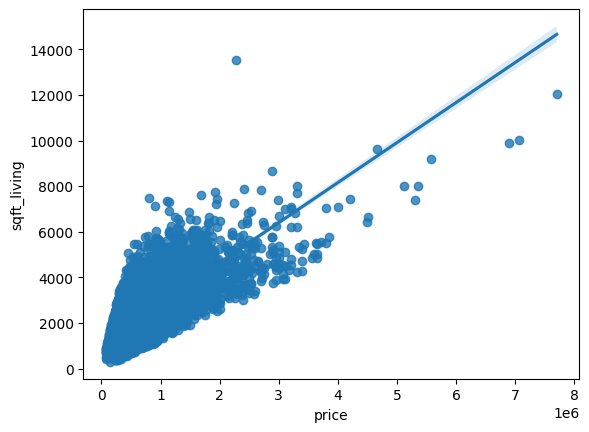

In [119]:
#correlation btw individual independent variables
sns.regplot(x=data.price, y=data.sqft_living)
plt.show()

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 2.6 MB


In [121]:
columns_to_convert = ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade',
                      'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
data[columns_to_convert] = data[columns_to_convert].astype(float)

print(data.dtypes)

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
sqft_living15    float64
sqft_lot15       float64
dtype: object


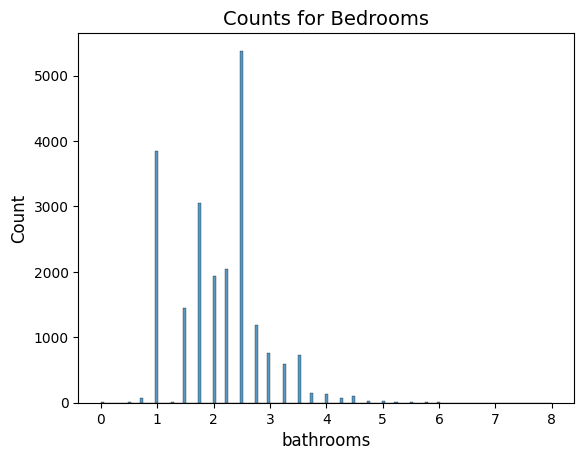

In [122]:
sns.histplot(data['bathrooms'], kde=False)
plt.xlabel('bathrooms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts for Bedrooms', fontsize=14)
plt.show()

In [123]:
#describe the dataset
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


<AxesSubplot: xlabel='sqft_living', ylabel='sqft_living'>

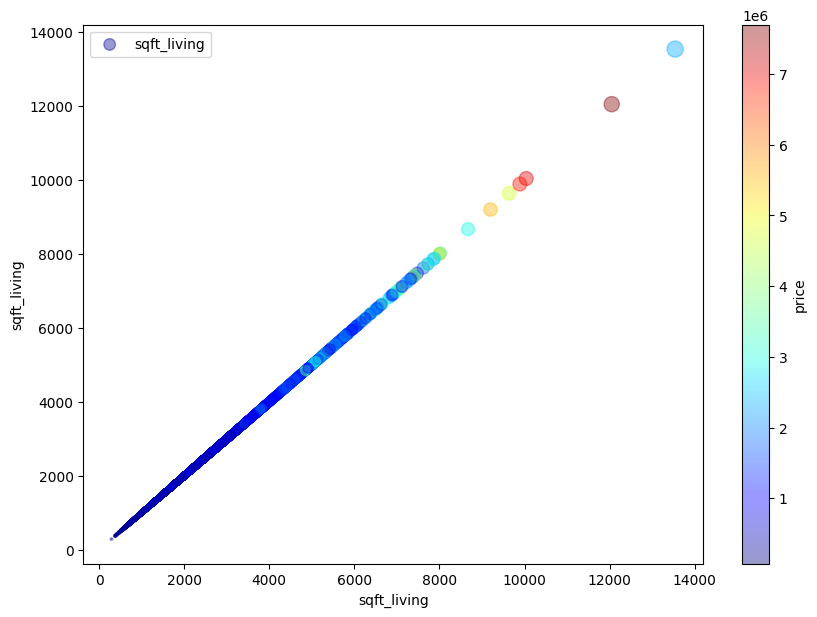

In [124]:
#Visualize housing prices by population in area.

# The circle represents population and color represents prices.

# Assuming you have a DataFrame called 'houses' with columns 'sqft_lot15', 'zipcode', and 'median_house_value'
data.plot(kind="scatter", x="sqft_living", y="sqft_living", alpha=0.4,
          s=data["sqft_living"] / 100, label="sqft_living", figsize=(10, 7),
          c="price", cmap="jet", colorbar=True, sharex=False)



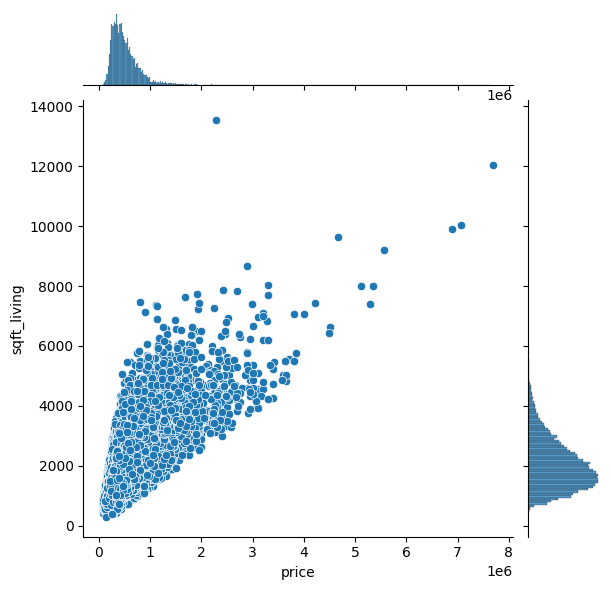

In [125]:
#visualize the realtionship between price & sqft living

sns.jointplot(x="price", y="sqft_living", data=data)

<AxesSubplot: >

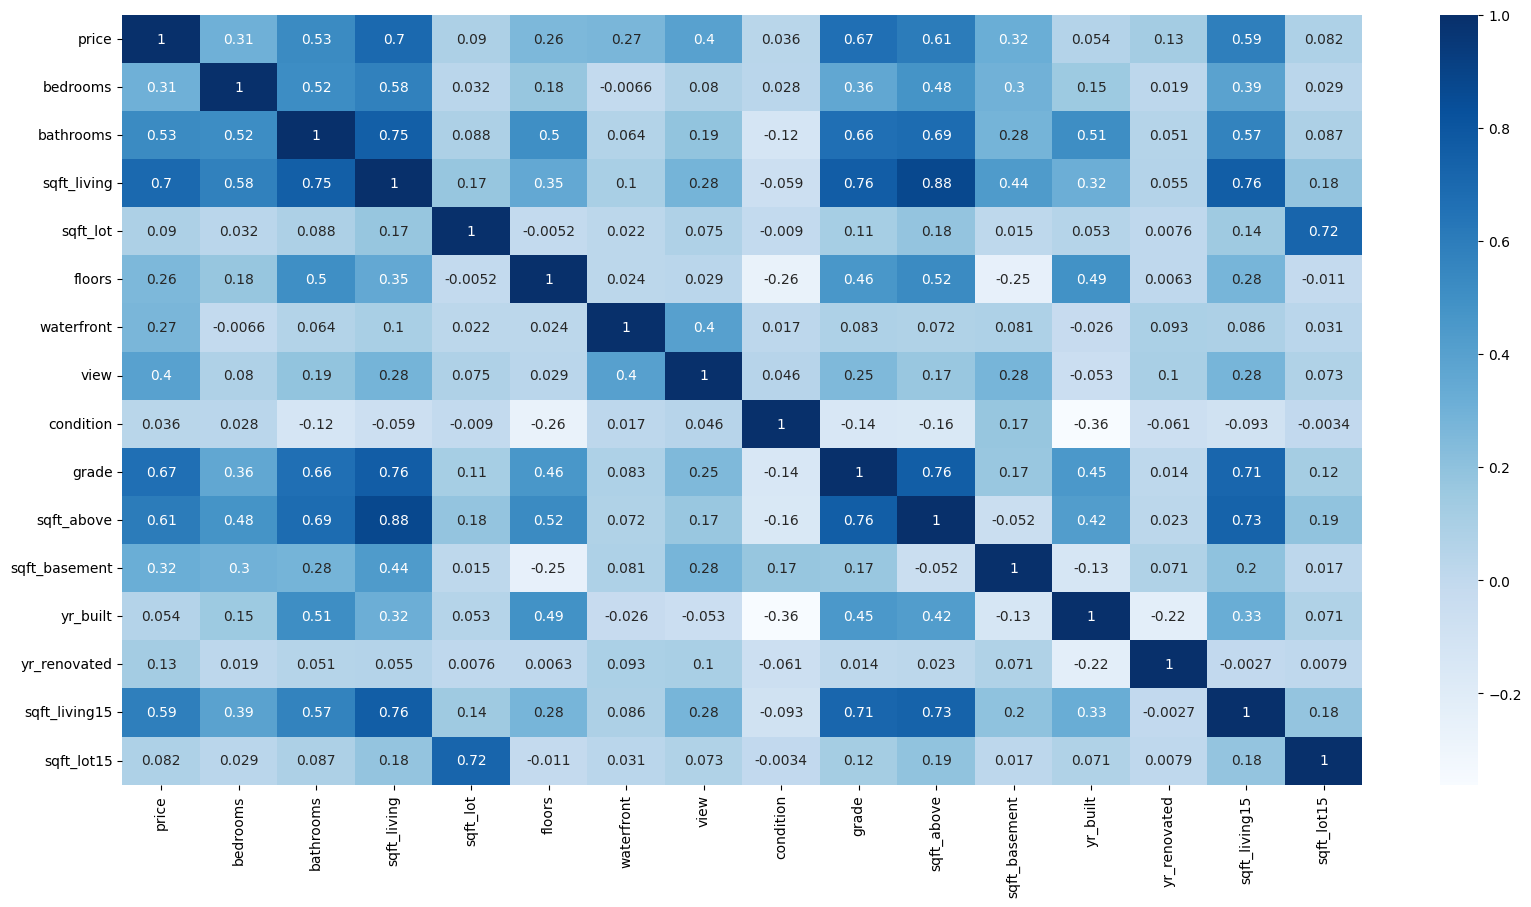

In [126]:
#Visualize correlations between all features and the target variable.

# We will use the Pearson Correlation method.
corr = data.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True, cmap = 'Blues')

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

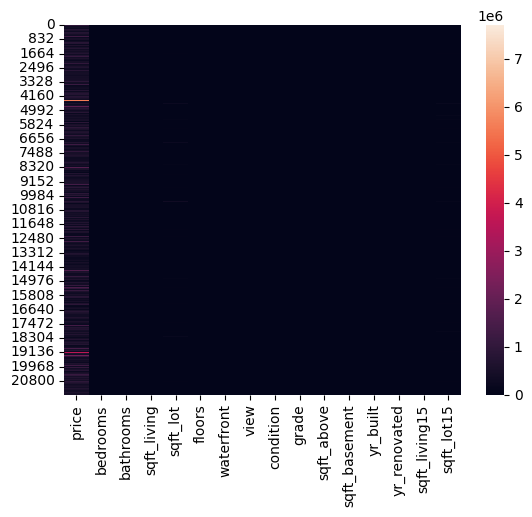

In [127]:
sns.heatmap(data)
data.isnull().sum()

Splitting & Training Model

In [128]:

columns_to_drop = ['condition', 'yr_built', 'sqft_lot15', 'sqft_lot', 'yr_renovated', 'floors', 'waterfront', 'view', 'sqft_basement']
data.drop(columns=columns_to_drop, inplace=True)

In [129]:
X = data.drop('price', axis=1)
Y = data['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 25)

In [130]:
x = np.array(X_test)
y = np.array(Y_test)
x.shape, y.shape

((25, 6), (25,))

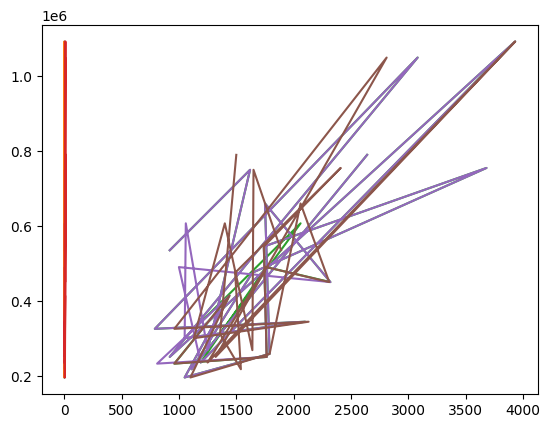

In [131]:
plt.plot(x, y)
plt.show()

In [132]:
model = LinearRegression()
model.fit(X_test, Y_test)

LinearRegression()

In [139]:
#model performance evaluation
predictions = model.predict(X_test)

In [134]:
predictions

array([ 543664.96300176,  487392.96461561,  334837.86168421,
        522158.01537433,  254731.53551333,  402397.39016034,
        296644.43823878,  700010.67658624,  235225.01799625,
       1159209.29326552,  281189.00364194,  596391.18490882,
        534655.71438771,  526151.69415491,  430049.00128379,
        163037.82173408,  418591.01473809,  258564.56063296,
        429949.9475322 ,  505747.66756291,  917004.03354599,
        438647.89654403,  286161.96962758,  328368.84052221,
        748567.49274642])

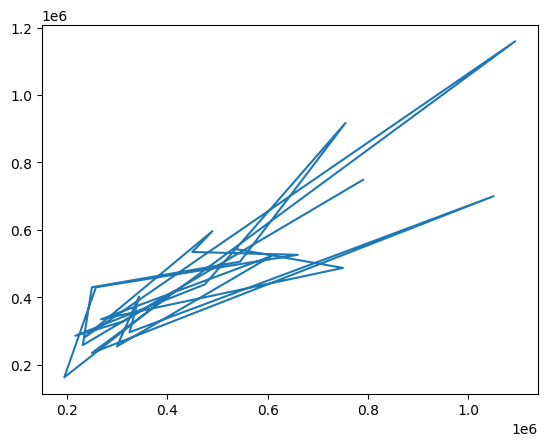

In [135]:
plt.plot(np.array(Y_test), np.array(predictions))
plt.show()

In [136]:
loss = np.sqrt(metrics.mean_absolute_error(Y_test, predictions))

In [137]:
loss

292.3949081544502

In [140]:
#model performance evaluation
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 14089030548.606224
Mean Absolute Error (MAE): 85494.78231464938
R-squared (R2): 0.7770869157407755
